# Fruit Image Classification using FruitNet
This notebook is written and executed by **Dr Raheel Siddiqi** on *17-11-2019*. The notebook presents an experiment to classify fruit images using *FruitNet*. FruitNet is based on a very simple 12-layer architecture, where only 4 layers have trainable weights and biases. In order to avoid overfitting the following four steps are ensured:
1. Use of large train set.
2. Using a low capacity network i.e. less number of layers, less learnable parameters. This is done to reduce memorization capacity.
3. Adding weight regularization to dense layer.
4. Drop out layers have also been added.

[Fruits 360](https://www.kaggle.com/moltean/fruits) dataset (containing 52262 training images and 17540 test images belonging to 101 fruit classes) has been exploited for the task.  

## Setting up the model

In [1]:
import os
import numpy as np
import keras
from keras import models
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras import optimizers
from keras.callbacks import ModelCheckpoint

fruitNetModel=models.Sequential()

fruitNetModel.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(100, 100, 3)))
fruitNetModel.add(layers.Conv2D(64, (3, 3), activation='relu'))
fruitNetModel.add(layers.MaxPooling2D(pool_size=(2, 2)))
fruitNetModel.add(layers.Dropout(0.2))

fruitNetModel.add(layers.Conv2D(128, (3, 3), activation='relu'))
fruitNetModel.add(layers.Conv2D(128, (3, 3), activation='relu'))
fruitNetModel.add(layers.MaxPooling2D(pool_size=(2, 2)))
fruitNetModel.add(layers.Dropout(0.2))

fruitNetModel.add(layers.Flatten())
fruitNetModel.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
fruitNetModel.add(layers.Dropout(0.2))
fruitNetModel.add(layers.Dense(101, activation='softmax'))

fruitNetModel.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['categorical_accuracy'])
fruitNetModel.summary()

filepath="FruitNet4_fruit_image_classification_best_model_101_classes.h5"
checkpoint = ModelCheckpoint(filepath, save_best_only=True)
callbacks_list = [checkpoint]

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 64)        1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 46, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)    

## Setting up Training and Validation Data

In [2]:
train_dir='D:\\TensorFlow Programs\\fruit_image_classification_101_classes\\fruits\\fruits-360\\Training'
validation_dir='D:\\TensorFlow Programs\\fruit_image_classification_101_classes\\fruits\\fruits-360\\Test'

In [3]:
batch_size=32
number_of_training_samples=52262
number_of_test_samples=17540

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(100, 100),
        batch_size=batch_size)

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(100, 100),
        batch_size=batch_size, shuffle=False)

Found 52262 images belonging to 101 classes.
Found 17540 images belonging to 101 classes.


## Model Training

In [5]:
import math

history = fruitNetModel.fit_generator(
      train_generator,
      steps_per_epoch=math.ceil(number_of_training_samples//batch_size),
      epochs=75,
      callbacks=callbacks_list,
      validation_data=validation_generator,
      validation_steps=math.ceil(number_of_test_samples//batch_size))

Instructions for updating:
Use tf.cast instead.
Epoch 1/75
1633/1633 [==============================] - 1351s 827ms/step - loss: 1.9607 - categorical_accuracy: 0.5447 - val_loss: 0.5926 - val_categorical_accuracy: 0.9216
Epoch 2/75
1633/1633 [==============================] - 532s 326ms/step - loss: 0.7354 - categorical_accuracy: 0.8543 - val_loss: 0.4311 - val_categorical_accuracy: 0.9480
Epoch 3/75
1633/1633 [==============================] - 506s 310ms/step - loss: 0.5468 - categorical_accuracy: 0.9064 - val_loss: 0.3384 - val_categorical_accuracy: 0.9749
Epoch 4/75
1633/1633 [==============================] - 505s 309ms/step - loss: 0.4468 - categorical_accuracy: 0.9279 - val_loss: 0.2631 - val_categorical_accuracy: 0.9881
Epoch 5/75
1633/1633 [==============================] - 429s 262ms/step - loss: 0.3913 - categorical_accuracy: 0.9397 - val_loss: 0.2914 - val_categorical_accuracy: 0.9663
Epoch 6/75
1633/1633 [==============================] - 407s 249ms/step - loss: 0.3452 - ca

Epoch 47/75
1633/1633 [==============================] - 401s 245ms/step - loss: 0.1366 - categorical_accuracy: 0.9865 - val_loss: 0.1184 - val_categorical_accuracy: 0.9930
Epoch 48/75
1633/1633 [==============================] - 399s 245ms/step - loss: 0.1384 - categorical_accuracy: 0.9854 - val_loss: 0.1143 - val_categorical_accuracy: 0.9946
Epoch 49/75
1633/1633 [==============================] - 399s 244ms/step - loss: 0.1325 - categorical_accuracy: 0.9865 - val_loss: 0.1270 - val_categorical_accuracy: 0.9869
Epoch 50/75
1633/1633 [==============================] - 406s 249ms/step - loss: 0.1362 - categorical_accuracy: 0.9854 - val_loss: 0.1854 - val_categorical_accuracy: 0.9770
Epoch 51/75
1633/1633 [==============================] - 419s 257ms/step - loss: 0.1368 - categorical_accuracy: 0.9859 - val_loss: 0.1265 - val_categorical_accuracy: 0.9922
Epoch 52/75
1633/1633 [==============================] - 415s 254ms/step - loss: 0.1332 - categorical_accuracy: 0.9869 - val_loss: 0.10

## Visualization of the training process

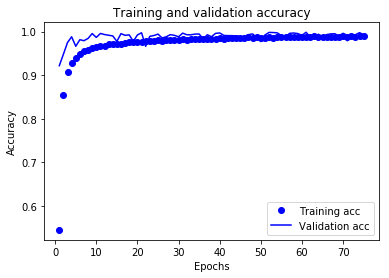

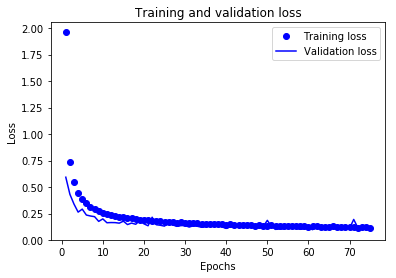

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Displaying the validation accuracy of the best model

In [7]:
from tensorflow.python.keras.models import load_model

best_model = load_model('FruitNet4_fruit_image_classification_best_model_101_classes.h5')
steps_test=int(number_of_test_samples/batch_size)
result = best_model.evaluate_generator(validation_generator, steps=steps_test)
print("Best validation accuracy: {0:.2%}".format(result[1]))

Best validation accuracy: 99.75%


## Predicting labels for Fruit Images

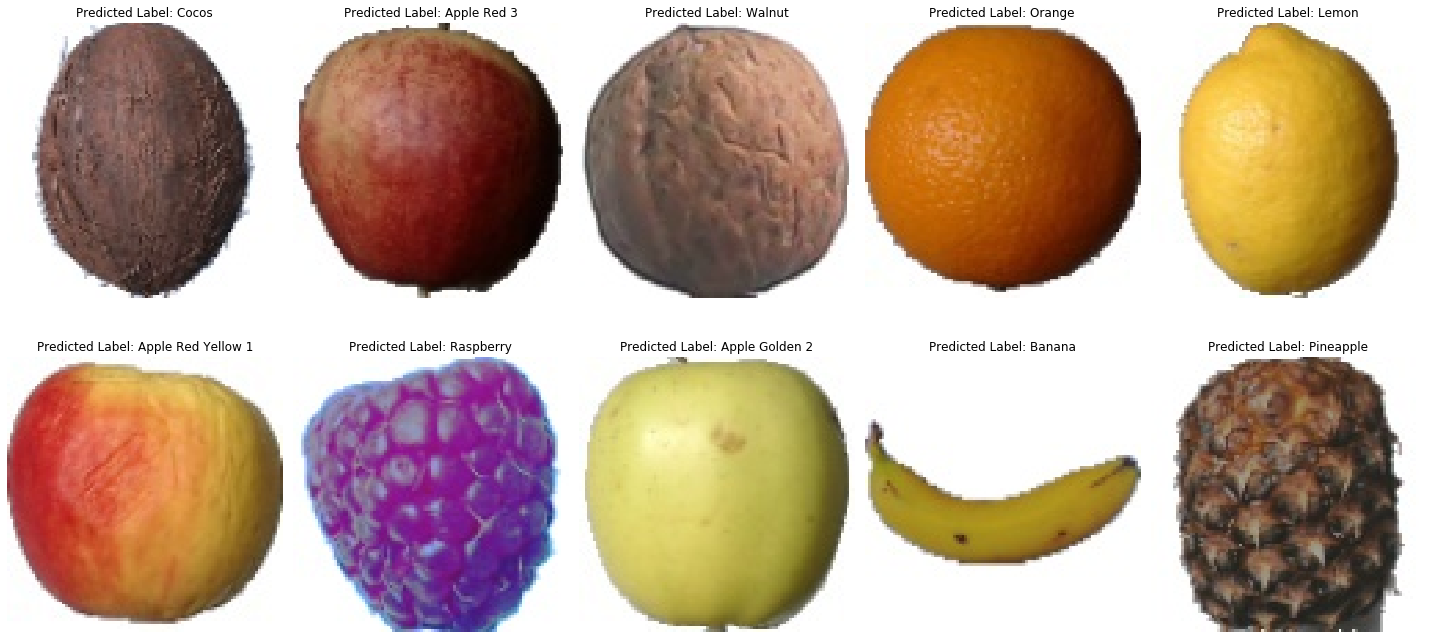

In [8]:
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
%matplotlib inline

TEST_DIR='D:\\TensorFlow Programs\\fruit_image_classification_101_classes\\fruits\\fruits-360\\Test'
CATEGORIES=[]
for category in os.listdir(TEST_DIR):
    CATEGORIES.append(category)

fig = plt.figure(figsize=(20, 10))
columns = 5
rows = 2
ax=[]
filenames=['0_100.jpg','4_100.jpg','12_100.jpg','60_100.jpg','63_100.jpg','64_100.jpg','77_100.jpg','99_100.jpg','110_100.jpg','214_100.jpg']
img_array=[]
for k in range(len(filenames)):
    img= cv2.imread(filenames[k])  
    img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img=img.astype(np.float32)/255.
    img_array.append(img)

for i in range(1,columns*rows+1):
    ax.append(fig.add_subplot(rows, columns, i))
    test_data=np.array([img_array[i-1]])
    prediction = best_model.predict(test_data)
    pred_name = CATEGORIES[np.argmax(prediction)]
    ax[-1].set_title("Predicted Label: "+pred_name)  # set title
    ax[i-1].set_xticklabels([])
    ax[i-1].set_yticklabels([])
    plt.axis('off')
    plt.imshow(img_array[i-1])

plt.subplots_adjust(wspace=0, hspace=0,left=0.1,right=0.9, bottom=0.1, top=0.9)
plt.tight_layout()
plt.show()  # finally, render the plot